In [15]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

In [113]:
df = pd.read_csv('data/turtles_cleaned.csv')

In [89]:
df.head()

,CaptureSite,ForagingGround,Species,CCL_cm,CCW_cm,Weight_Kg,CalendarWeek
0,CaptureSite_0,Ocean,Species_6,64.70,62.60,NaN,50
1,CaptureSite_0,Ocean,Species_6,35.85,31.35,NaN,42
2,CaptureSite_0,Ocean,Species_5,51.80,49.20,NaN,43
3,CaptureSite_0,Ocean,Species_6,60.50,59.00,NaN,10
4,CaptureSite_0,Ocean,Species_5,34.70,33.00,NaN,31


In [90]:
df.shape

(18062, 7)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18062 entries, 0 to 18061
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CaptureSite     18062 non-null  object 
 1   ForagingGround  18062 non-null  object 
 2   Species         18062 non-null  object 
 3   CCL_cm          18038 non-null  float64
 4   CCW_cm          18035 non-null  float64
 5   Weight_Kg       12653 non-null  float64
 6   CalendarWeek    18062 non-null  int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 987.9+ KB


In [114]:
df[['Weight_Kg', 'CCL_cm', 'CCW_cm']] = \
    df[['Weight_Kg', 'CCL_cm', 'CCW_cm']].replace(0, np.nan)

In [115]:
df = df.dropna(subset=['CCL_cm', 'CCW_cm'])

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18033 entries, 0 to 18061
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CaptureSite     18033 non-null  object 
 1   ForagingGround  18033 non-null  object 
 2   Species         18033 non-null  object 
 3   CCL_cm          18033 non-null  float64
 4   CCW_cm          18033 non-null  float64
 5   Weight_Kg       12650 non-null  float64
 6   CalendarWeek    18033 non-null  int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 1.1+ MB


In [117]:
df.nsmallest(10, 'Weight_Kg')

,CaptureSite,ForagingGround,Species,CCL_cm,CCW_cm,Weight_Kg,CalendarWeek
10392,CaptureSite_24,Ocean,Species_6,5.4,5.2,0.02,17
1083,CaptureSite_10,Ocean,Species_6,5.7,6.1,0.03,20
1335,CaptureSite_10,Ocean,Species_6,8.1,7.2,0.03,13
4908,CaptureSite_15,Creek,Species_0,2.0,2.0,0.03,18
6828,CaptureSite_19,Ocean,Species_4,87.5,84.5,0.03,30
12942,CaptureSite_25,Creek,Species_6,6.0,5.6,0.03,15
14586,CaptureSite_4,Ocean,Species_4,78.6,79.8,0.03,28
17585,CaptureSite_9,Ocean,Species_5,100.0,95.6,0.03,13
7739,CaptureSite_21,Creek,Species_6,5.9,5.5,0.04,25
2167,CaptureSite_12,Ocean,Species_5,6.0,6.0,0.05,23


In [ ]:
#df['life_stage'] = np.where(df['CCL_cm'] < 10, 'hatchling', 'other')

<Axes: xlabel='CCL_cm', ylabel='Weight_Kg'>

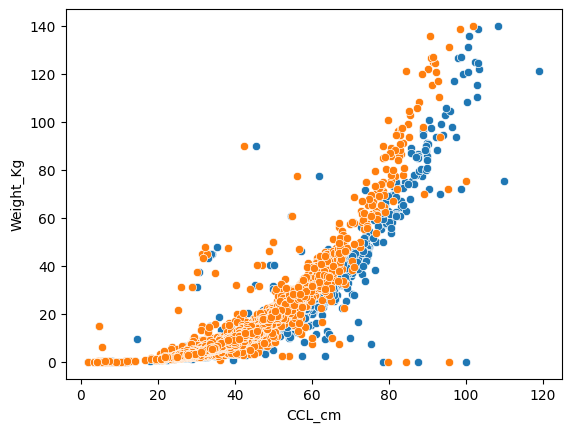

In [118]:
sns.scatterplot(data=df, x='CCL_cm', y='Weight_Kg')
sns.scatterplot(data=df, x='CCW_cm', y='Weight_Kg')

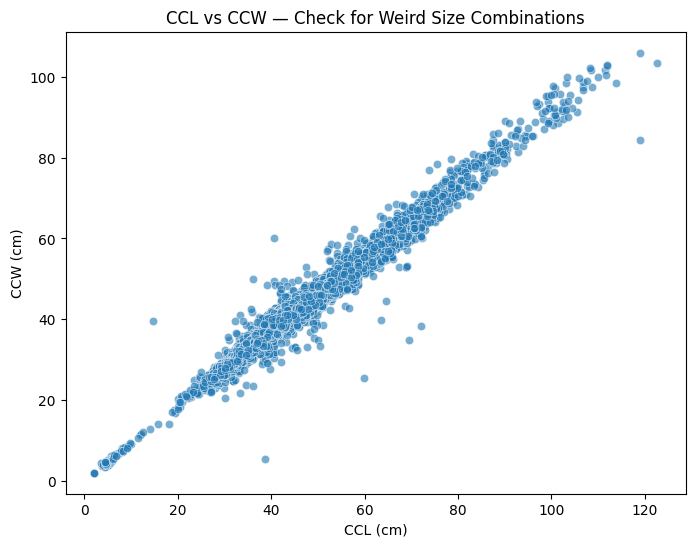

In [119]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='CCL_cm', y='CCW_cm', alpha=0.6)
plt.title("CCL vs CCW — Check for Weird Size Combinations")
plt.xlabel("CCL (cm)")
plt.ylabel("CCW (cm)")
plt.show()

In [120]:
ratio = df['CCL_cm'] / df['CCW_cm']
df = df[(ratio > 0.5) & (ratio < 2)]

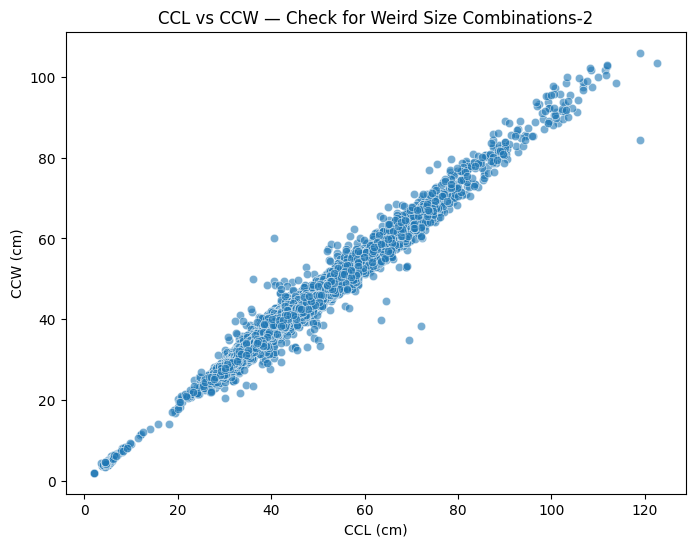

In [121]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='CCL_cm', y='CCW_cm', alpha=0.6)
plt.title("CCL vs CCW — Check for Weird Size Combinations-2")
plt.xlabel("CCL (cm)")
plt.ylabel("CCW (cm)")
plt.show()

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18030 entries, 0 to 18061
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CaptureSite     18030 non-null  object 
 1   ForagingGround  18030 non-null  object 
 2   Species         18030 non-null  object 
 3   CCL_cm          18030 non-null  float64
 4   CCW_cm          18030 non-null  float64
 5   Weight_Kg       12647 non-null  float64
 6   CalendarWeek    18030 non-null  int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 1.1+ MB


<Axes: xlabel='CCL_cm', ylabel='Weight_Kg'>

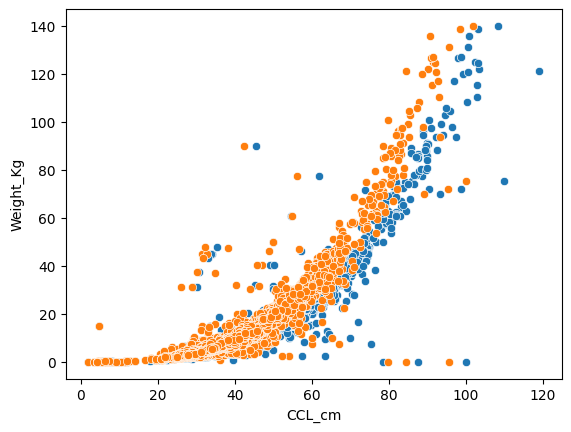

In [123]:
sns.scatterplot(data=df, x='CCL_cm', y='Weight_Kg')
sns.scatterplot(data=df, x='CCW_cm', y='Weight_Kg')

In [124]:
df.nsmallest(10, 'Weight_Kg')

,CaptureSite,ForagingGround,Species,CCL_cm,CCW_cm,Weight_Kg,CalendarWeek
10392,CaptureSite_24,Ocean,Species_6,5.4,5.2,0.02,17
1083,CaptureSite_10,Ocean,Species_6,5.7,6.1,0.03,20
1335,CaptureSite_10,Ocean,Species_6,8.1,7.2,0.03,13
4908,CaptureSite_15,Creek,Species_0,2.0,2.0,0.03,18
6828,CaptureSite_19,Ocean,Species_4,87.5,84.5,0.03,30
12942,CaptureSite_25,Creek,Species_6,6.0,5.6,0.03,15
14586,CaptureSite_4,Ocean,Species_4,78.6,79.8,0.03,28
17585,CaptureSite_9,Ocean,Species_5,100.0,95.6,0.03,13
7739,CaptureSite_21,Creek,Species_6,5.9,5.5,0.04,25
2167,CaptureSite_12,Ocean,Species_5,6.0,6.0,0.05,23


In [125]:
df.iloc[6828]

CaptureSite       CaptureSite_19
ForagingGround             Ocean
Species                Species_5
CCL_cm                      52.8
CCW_cm                      44.5
Weight_Kg                  14.05
CalendarWeek                  50
Name: 6840, dtype: object

In [126]:
df.loc[(df['CCL_cm'] > 78) & (df['Weight_Kg'] < 0.05), 'Weight_Kg'] = np.nan

In [128]:
df.loc[(df['CCL_cm'] < 40) & (df['Weight_Kg'] > 30), 'Weight_Kg'] = np.nan

In [130]:
df.loc[(df['CCL_cm'] < 70) & (df['Weight_Kg'] > 70), 'Weight_Kg'] = np.nan

<Axes: xlabel='CCL_cm', ylabel='Weight_Kg'>

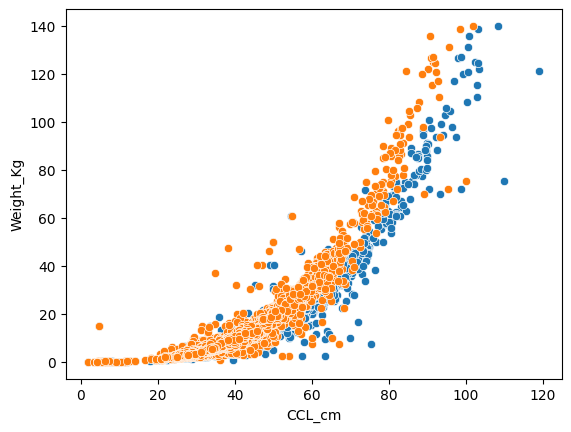

In [ ]:
sns.scatterplot(data=df, x='CCL_cm', y='Weight_Kg')
sns.scatterplot(data=df, x='CCW_cm', y='Weight_Kg')

In [76]:
#mask_bad = (df['Weight_kg'] > 30) & (df['CCL_cm'] < 40)
mask_bad = df['Weight_kg'] > 30
mask_bad.sum()

0

<Axes: xlabel='CCL_cm', ylabel='Weight_Kg'>

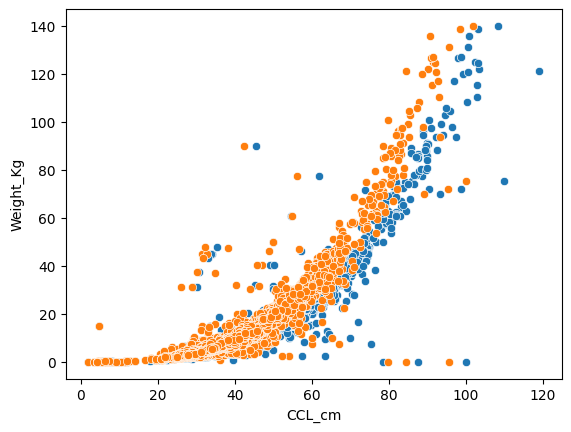

In [72]:
sns.scatterplot(data=df, x='CCL_cm', y='Weight_Kg')
sns.scatterplot(data=df, x='CCW_cm', y='Weight_Kg')

In [74]:
df[df['Weight_kg'] > 30].nsmallest(20, 'CCL_cm')


,CaptureSite,ForagingGround,Species,CCL_cm,CCW_cm,Weight_Kg,CalendarWeek,Weight_kg


In [63]:
mask_bad_weight = (df['Weight_Kg'] < 0.05) & (df['CCL_cm'] > 15)

df[mask_bad_weight][['Weight_Kg', 'CCL_cm', 'CCW_cm']].head()


,Weight_Kg,CCL_cm,CCW_cm
6828,0.03,87.5,84.5
14586,0.03,78.6,79.8
17585,0.03,100.0,95.6


In [66]:
df.loc[mask_bad_weight, 'Weight_kg'] = np.nan

In [67]:
df.nsmallest(10, 'Weight_Kg')[['Weight_Kg', 'CCL_cm', 'CCW_cm']]

,Weight_Kg,CCL_cm,CCW_cm
10392,0.02,5.4,5.2
1083,0.03,5.7,6.1
1335,0.03,8.1,7.2
4908,0.03,2.0,2.0
6828,0.03,87.5,84.5
12942,0.03,6.0,5.6
14586,0.03,78.6,79.8
17585,0.03,100.0,95.6
7739,0.04,5.9,5.5
2167,0.05,6.0,6.0


In [45]:
df[['Weight_Kg', 'CCL_cm', 'CCW_cm']].corr()

,Weight_Kg,CCL_cm,CCW_cm
Weight_Kg,1.000000,0.884016,0.870934
CCL_cm,0.884016,1.000000,0.986006
CCW_cm,0.870934,0.986006,1.000000


<Axes: xlabel='CCL_cm', ylabel='Weight_Kg'>

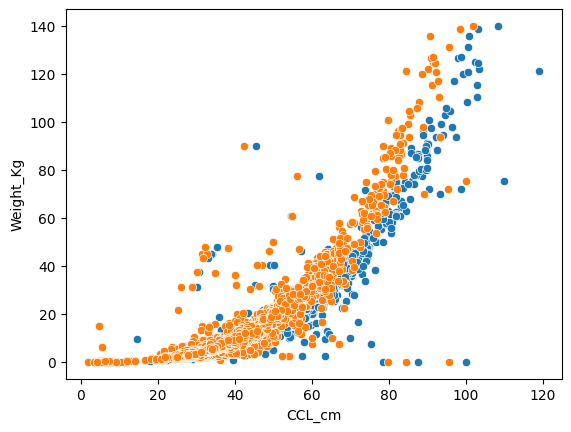

In [33]:
sns.scatterplot(data=df, x='CCL_cm', y='Weight_Kg')
sns.scatterplot(data=df, x='CCW_cm', y='Weight_Kg')


In [ ]:
imputer = KNNImputer(n_neighbors=5)
df[['Weight_Kg','CCL_cm','CCW_cm']] = imputer.fit_transform(df[['Weight_Kg','CCL_cm','CCW_cm']])